# ML Intro



### loading libraries

In [2]:
import matplotlib.image as img # To load the images
import matplotlib.pyplot as plt # To plot the images

import copy  # to copy variables
import numpy as np # To do some calculations
import pandas as pd # To work with dataframes (easier matrices)
from sklearn.ensemble import RandomForestClassifier # The machine learning model 
from os import listdir # To get a list of files in a folder
from sklearn.model_selection import train_test_split

# Flower example 

In [4]:
# provide the location of image for reading
bloem1 = img.imread("flower training/0003.png");

In [3]:
bloem1

array([[[0.25490198, 0.3254902 , 0.1882353 , 1.        ],
        [0.28235295, 0.34117648, 0.22745098, 1.        ],
        [0.2901961 , 0.3529412 , 0.24313726, 1.        ],
        ...,
        [0.25882354, 0.37254903, 0.18039216, 1.        ],
        [0.28235295, 0.4       , 0.20392157, 1.        ],
        [0.2901961 , 0.41960785, 0.20392157, 1.        ]],

       [[0.20392157, 0.2784314 , 0.14901961, 1.        ],
        [0.23921569, 0.3019608 , 0.2       , 1.        ],
        [0.28627452, 0.34117648, 0.23921569, 1.        ],
        ...,
        [0.27058825, 0.36862746, 0.1764706 , 1.        ],
        [0.25490198, 0.37254903, 0.1764706 , 1.        ],
        [0.2509804 , 0.37254903, 0.17254902, 1.        ]],

       [[0.18431373, 0.2509804 , 0.13333334, 1.        ],
        [0.2627451 , 0.30980393, 0.20784314, 1.        ],
        [0.30980393, 0.3529412 , 0.24705882, 1.        ],
        ...,
        [0.2901961 , 0.37254903, 0.18431373, 1.        ],
        [0.24313726, 0.337254

In [4]:
bloem1.shape

(128, 128, 4)

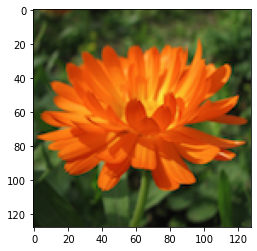

In [5]:
plt.imshow(bloem1)

In [6]:
layer1 = bloem1[:,:,0]
layer2 = bloem1[:,:,1]
layer3 = bloem1[:,:,2]
layer4 = bloem1[:,:,3]

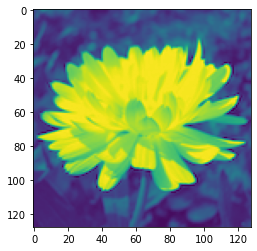

In [7]:
plt.imshow(layer1)

In [8]:
bloem1[:,:,1] = np.zeros((128, 128)) # set layer 2 to be all zeros
bloem1[:,:,2] = np.zeros((128, 128)) # set layer 3 to be all zeros

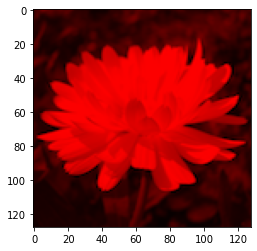

In [9]:
plt.imshow(bloem1)

Ok, now we are getting somewhere. We put layer 2 and 3 (index 1 and 2 remember) to zero and the final image is all red. We can conclude that layer 1 contains the red. So let's for now assume that the first layer is indeed red and the following layers are green and blue (RGB). Can you do the other layers yourself?

## Making the data matrix

The ML model we want to train expects

In [10]:
training_files = listdir("flower training")
training_files

['0003.png',
 '0113.png',
 '0166.png',
 '0102.png',
 '0157.png',
 '0139.png',
 '0039.png',
 '0045.png',
 '0050.png',
 '0132.png',
 '0074.png',
 '0210.png',
 '0193.png',
 '0177.png',
 '0081.png',
 '0101.png',
 '0094.png',
 '0087.png',
 '0092.png',
 '0145.png']

In [11]:
RGB_results = []
for file in training_files:
    flower_filepath = "flower training/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]

    RGB_loop = np.array([RED_layer, GREEN_layer, BLUE_layer]).flatten()
    
    RGB_results.append(RGB_loop)

RGB_results =  pd.DataFrame(RGB_results)


processing flower training/0003.png
processing flower training/0113.png
processing flower training/0166.png
processing flower training/0102.png
processing flower training/0157.png
processing flower training/0139.png
processing flower training/0039.png
processing flower training/0045.png
processing flower training/0050.png
processing flower training/0132.png
processing flower training/0074.png
processing flower training/0210.png
processing flower training/0193.png
processing flower training/0177.png
processing flower training/0081.png
processing flower training/0101.png
processing flower training/0094.png
processing flower training/0087.png
processing flower training/0092.png
processing flower training/0145.png


In [12]:
#RGB_results = RGB_results.fillna(0)
RGB_results

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.254902,0.282353,0.290196,0.317647,0.392157,0.450980,0.454902,0.427451,0.396078,0.368627,...,0.070588,0.070588,0.066667,0.070588,0.101961,0.125490,0.137255,0.149020,0.160784,0.164706
1,0.258824,0.266667,0.223529,0.239216,0.254902,0.282353,0.223529,0.254902,0.250980,0.270588,...,0.160784,0.219608,0.235294,0.141176,0.192157,0.137255,0.133333,0.109804,0.113725,0.133333
2,0.458824,0.454902,0.443137,0.439216,0.439216,0.435294,0.427451,0.419608,0.415686,0.411765,...,0.274510,0.278431,0.282353,0.278431,0.286275,0.294118,0.290196,0.282353,0.274510,0.262745
3,0.200000,0.180392,0.101961,0.098039,0.176471,0.215686,0.211765,0.184314,0.160784,0.160784,...,0.047059,0.031373,0.019608,0.023529,0.035294,0.039216,0.047059,0.027451,0.035294,0.074510
4,0.156863,0.164706,0.149020,0.129412,0.094118,0.062745,0.054902,0.054902,0.047059,0.039216,...,0.133333,0.117647,0.152941,0.180392,0.172549,0.156863,0.164706,0.164706,0.160784,0.156863
5,0.121569,0.188235,0.200000,0.211765,0.247059,0.282353,0.298039,0.282353,0.305882,0.345098,...,0.054902,0.054902,0.047059,0.043137,0.035294,0.027451,0.039216,0.043137,0.031373,0.031373
6,0.396078,0.349020,0.658824,0.937255,0.988235,0.952941,0.984314,0.992157,0.949020,0.701961,...,0.156863,0.133333,0.070588,0.054902,0.058824,0.035294,0.031373,0.027451,0.062745,0.152941
7,0.247059,0.203922,0.188235,0.160784,0.172549,0.156863,0.125490,0.145098,0.176471,0.219608,...,0.039216,0.047059,0.050980,0.039216,0.050980,0.074510,0.074510,0.062745,0.058824,0.058824
8,0.325490,0.301961,0.458824,0.584314,0.439216,0.054902,0.117647,0.129412,0.129412,0.164706,...,0.333333,0.274510,0.356863,0.313726,0.250980,0.219608,0.239216,0.239216,0.184314,0.149020
9,0.113725,0.090196,0.090196,0.090196,0.121569,0.168627,0.133333,0.074510,0.019608,0.054902,...,0.082353,0.109804,0.109804,0.090196,0.050980,0.058824,0.105882,0.121569,0.160784,0.164706


## Building the outcome vector (flower type for each file)


In [14]:
flower_metadata = pd.read_csv("all_flower_labels.csv", header = 0, sep = ";")
outcome_vector = pd.DataFrame({"training_file" : training_files})
outcome_data = pd.merge(outcome_vector, flower_metadata, left_on = 'training_file', right_on = 'file')[["training_file","name" ]]
outcome_data.head()

,training_file,name
0,0003.png,calendula
1,0113.png,calendula
2,0166.png,calendula
3,0102.png,calendula
4,0157.png,rose


## Building the model

Now that we have our data matrix, we are going to build a model. In python this is done by first defining a model and storing this in an object. Afterwards we add data to this model and train it.

In [15]:
ML_model = RandomForestClassifier()

In [16]:
outcome_data['name']

0     calendula
1     calendula
2     calendula
3     calendula
4          rose
5     calendula
6     calendula
7          rose
8          rose
9     calendula
10         rose
11         rose
12         rose
13         rose
14         rose
15         rose
16    calendula
17    calendula
18         rose
19    calendula
Name: name, dtype: object

In [17]:
ML_model.fit(RGB_results, outcome_data['name'])


RandomForestClassifier()

## Evaluating the model on the training data

A first step we can do to see if our model has at least trained itself, is to give it the training data to predict. If it has learned something we expect it to predict these labels quite ok.

In [18]:
y_pred=ML_model.predict(RGB_results)

prediction_check = pd.DataFrame({'True label':outcome_data['name'],
                                'Predicted label': y_pred})
prediction_check

,True label,Predicted label
0,calendula,calendula
1,calendula,calendula
2,calendula,calendula
3,calendula,calendula
4,rose,rose
5,calendula,calendula
6,calendula,calendula
7,rose,rose
8,rose,rose
9,calendula,calendula


Ok, it predicts all traing data labels correctly. The question is now whether the model has simply memorized all the training data or whether it actually learned the difference between calendula and roses. 

## Evaluating the model on the test data

This one you should be able to tackle on your own. It's the same as making the training data but now with the test set images. When that is done, you evaluate the model on this data and compare to the true outcome. This will tell you whether it has actually learned the difference or not.

In [19]:
testing_files = listdir("flower test set")
testing_files

['0021.png',
 '0061.png',
 '0151.png',
 '0016.png',
 '0188.png',
 '0122.png',
 '0027.png',
 '0201.png',
 '0042.png',
 '0164.png',
 '0095.png',
 '0127.png',
 '0062.png',
 '0163.png',
 '0106.png',
 '0159.png',
 '0006.png',
 '0105.png',
 '0179.png']

In [20]:
RGB_test = []
for file in testing_files:
    flower_filepath = "flower test set/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]
    
    RGB_loop = np.array([RED_layer, GREEN_layer, BLUE_layer]).flatten()
          
    RGB_test.append(RGB_loop)

RGB_test =  pd.DataFrame(RGB_test)


processing flower test set/0021.png
processing flower test set/0061.png
processing flower test set/0151.png
processing flower test set/0016.png
processing flower test set/0188.png
processing flower test set/0122.png
processing flower test set/0027.png
processing flower test set/0201.png
processing flower test set/0042.png
processing flower test set/0164.png
processing flower test set/0095.png
processing flower test set/0127.png
processing flower test set/0062.png
processing flower test set/0163.png
processing flower test set/0106.png
processing flower test set/0159.png
processing flower test set/0006.png
processing flower test set/0105.png
processing flower test set/0179.png


In [21]:
RGB_test

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.250980,0.282353,0.282353,0.254902,0.258824,0.274510,0.274510,0.282353,0.266667,0.258824,...,0.058824,0.058824,0.070588,0.094118,0.113725,0.129412,0.133333,0.109804,0.113725,0.121569
1,0.258824,0.345098,0.517647,0.611765,0.588235,0.694118,0.709804,0.537255,0.372549,0.196078,...,0.152941,0.113725,0.098039,0.121569,0.168627,0.203922,0.152941,0.109804,0.235294,0.341176
2,0.152941,0.192157,0.278431,0.337255,0.368627,0.360784,0.309804,0.313726,0.482353,0.666667,...,0.109804,0.098039,0.062745,0.082353,0.082353,0.062745,0.058824,0.054902,0.050980,0.047059
3,0.580392,0.588235,0.588235,0.580392,0.580392,0.588235,0.588235,0.584314,0.588235,0.592157,...,0.411765,0.360784,0.317647,0.321569,0.341176,0.341176,0.329412,0.313726,0.274510,0.235294
4,0.980392,0.988235,0.992157,0.992157,0.988235,0.921569,0.917647,0.956863,0.945098,0.909804,...,0.027451,0.031373,0.027451,0.027451,0.035294,0.031373,0.023529,0.027451,0.023529,0.023529
5,0.164706,0.188235,0.192157,0.160784,0.145098,0.152941,0.149020,0.149020,0.145098,0.141176,...,0.070588,0.074510,0.058824,0.047059,0.047059,0.043137,0.035294,0.039216,0.035294,0.039216
6,0.231373,0.129412,0.164706,0.243137,0.215686,0.258824,0.235294,0.062745,0.062745,0.047059,...,0.070588,0.074510,0.070588,0.066667,0.066667,0.074510,0.070588,0.066667,0.121569,0.082353
7,0.039216,0.027451,0.027451,0.027451,0.027451,0.031373,0.035294,0.031373,0.043137,0.066667,...,0.062745,0.078431,0.070588,0.062745,0.090196,0.090196,0.070588,0.090196,0.196078,0.160784
8,0.262745,0.235294,0.215686,0.215686,0.200000,0.176471,0.172549,0.180392,0.192157,0.149020,...,0.168627,0.188235,0.184314,0.180392,0.168627,0.172549,0.160784,0.160784,0.164706,0.152941
9,0.956863,0.933333,0.925490,0.933333,0.937255,0.878431,0.450980,0.000000,0.105882,0.039216,...,0.168627,0.058824,0.066667,0.047059,0.113725,0.156863,0.145098,0.129412,0.125490,0.160784


Evaluating the test set

In [22]:
y_pred_testset=ML_model.predict(RGB_test)
y_pred_testset


array(['calendula', 'calendula', 'calendula', 'rose', 'rose', 'calendula',
       'calendula', 'calendula', 'rose', 'calendula', 'rose', 'calendula',
       'rose', 'calendula', 'calendula', 'rose', 'rose', 'rose',
       'calendula'], dtype=object)

In [23]:
flower_metadata_test = pd.read_csv("all_flower_labels.csv", header = 0, sep = ";")
outcome_vector_test = pd.DataFrame({"test_file" : testing_files})

outcome_data_test = pd.merge(outcome_vector_test, flower_metadata_test, left_on = 'test_file', right_on = 'file')[["test_file", "label", "name"]]
outcome_data_test.head()

,test_file,label,name
0,0021.png,2,calendula
1,0061.png,2,calendula
2,0151.png,2,calendula
3,0016.png,1,rose
4,0188.png,1,rose


In [24]:
outcome_data_test['predictions'] = y_pred_testset
outcome_data_test


,test_file,label,name,predictions
0,0021.png,2,calendula,calendula
1,0061.png,2,calendula,calendula
2,0151.png,2,calendula,calendula
3,0016.png,1,rose,rose
4,0188.png,1,rose,rose
5,0122.png,2,calendula,calendula
6,0027.png,2,calendula,calendula
7,0201.png,1,rose,calendula
8,0042.png,1,rose,rose
9,0164.png,2,calendula,calendula


# Some real-life data


In [25]:
patient = pd.read_csv("signals_hospital.csv")
patient = patient[patient['Code'] == 29][["Abbreviation", "DateTime", "Value"]]
patient["DateTime"] = pd.to_datetime(patient["DateTime"])


patient = patient[patient['Abbreviation'].isin(['FiO2(read)', 'Glucose(Plasma/Accuchek2)', 'HF',
        'PFI', 'Resp R', 'SpO2', 'Taxillair',
       'Thuid']) ]

patient['Value'] = patient['Value'].astype(float)
patient.head()

patient = pd.pivot(patient, index="DateTime", columns="Abbreviation", values="Value")
patient['Time'] = patient.index

In [26]:
patient

Abbreviation,FiO2(read),Glucose(Plasma/Accuchek2),HF,PFI,Resp R,SpO2,Taxillair,Thuid,Time
DateTime,,,,,,,,,
2012-04-01 14:16:00,NaN,NaN,NaN,1.10,NaN,89.400002,NaN,NaN,2012-04-01 14:16:00
2012-04-01 14:17:00,NaN,NaN,NaN,1.80,NaN,92.500000,NaN,NaN,2012-04-01 14:17:00
2012-04-01 14:18:00,NaN,NaN,NaN,1.50,NaN,90.000000,NaN,NaN,2012-04-01 14:18:00
2012-04-01 14:19:00,NaN,NaN,NaN,1.70,NaN,86.800003,NaN,NaN,2012-04-01 14:19:00
2012-04-01 14:20:00,NaN,NaN,NaN,1.10,NaN,84.599998,NaN,NaN,2012-04-01 14:20:00
...,...,...,...,...,...,...,...,...,...
2012-05-10 04:13:00,24.0,NaN,40.0,NaN,14.0,NaN,NaN,NaN,2012-05-10 04:13:00
2012-05-10 04:14:00,24.0,NaN,32.0,NaN,0.0,NaN,NaN,NaN,2012-05-10 04:14:00
2012-05-10 04:15:00,24.0,NaN,0.0,0.04,0.0,68.900002,NaN,NaN,2012-05-10 04:15:00


In [27]:
55560*30

1666800

In [28]:
patient['HF_drops'] = patient['HF']
patient.loc[ patient['HF'] >80    ,'HF_drops'] = np.nan

In [29]:
patient["FiO2(read)"] = patient["FiO2(read)"].fillna(21)

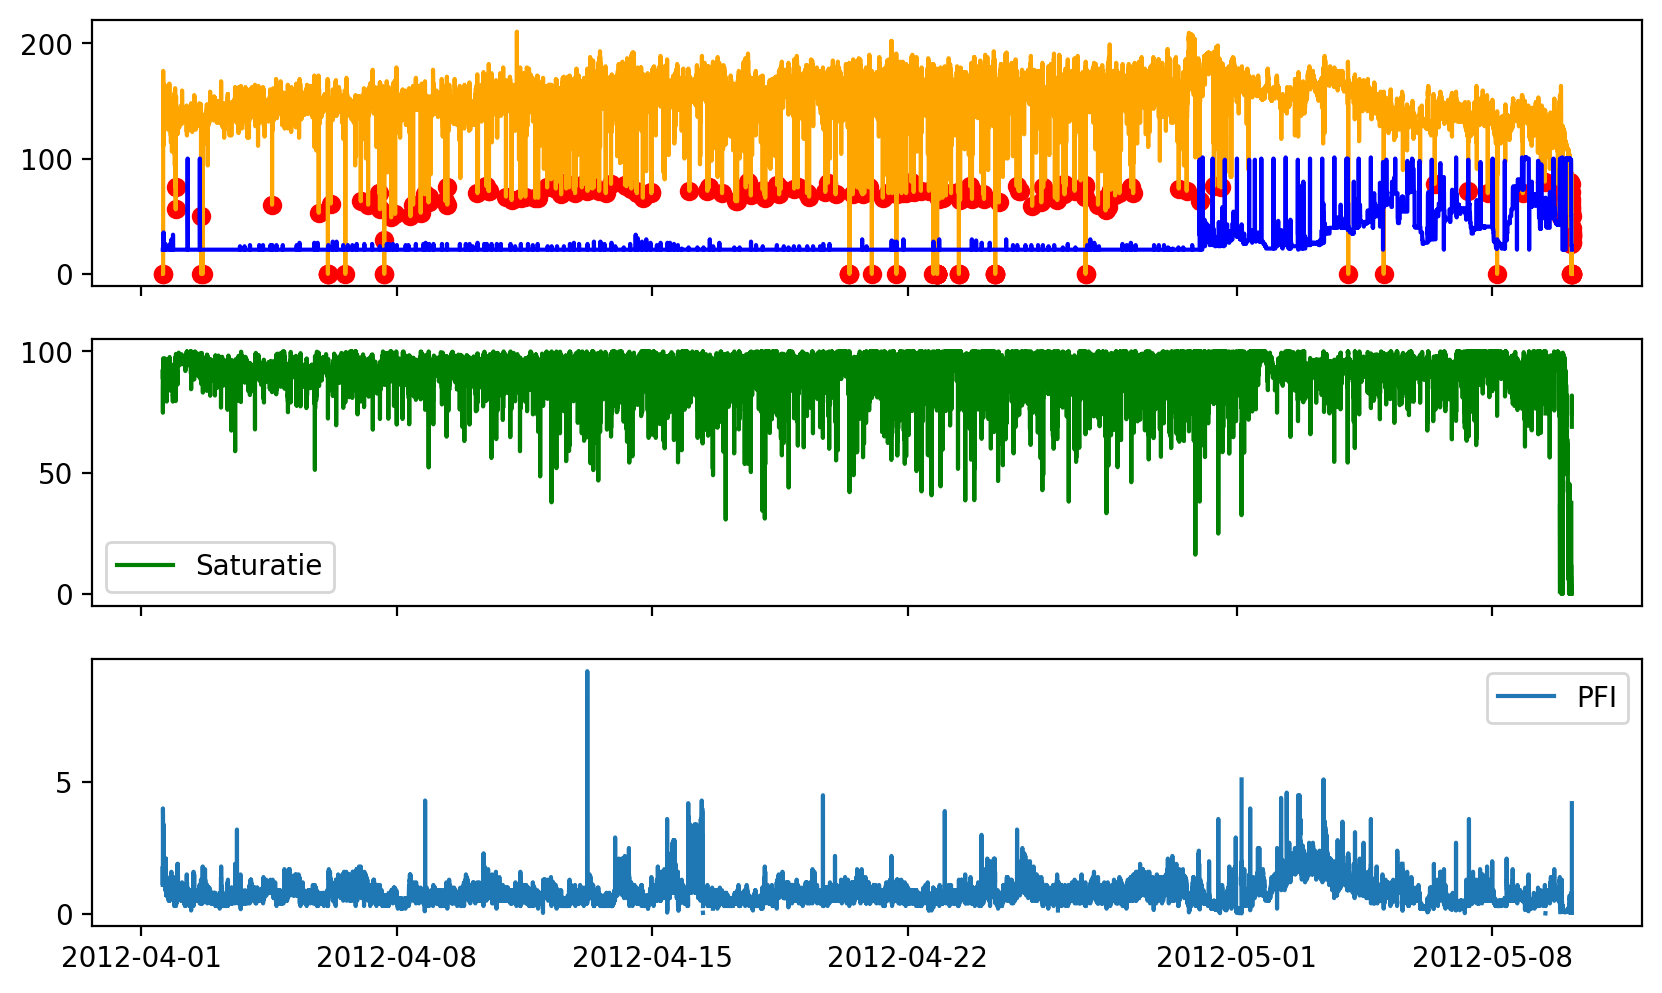

In [30]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex = True, figsize=(10,6), dpi = 200)

ax1.plot(patient["Time"], patient["HF"], label = "Hartslag", color = "orange")
ax1.scatter(patient["Time"], patient["HF_drops"], label = "stilstand", color = "red")
ax1.plot(patient["Time"], patient["FiO2(read)"], label = "zuurstof", color = "blue")
#ax1.legend()

ax2.plot(patient["Time"], patient["SpO2"], label = "Saturatie", color = "green")
ax2.legend()

ax3.plot(patient["Time"], patient["PFI"], label = "PFI")
ax3.legend()